<a href="https://colab.research.google.com/github/AliARajabi/deep-learning/blob/main/RNN/implementation_of_simple_RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np

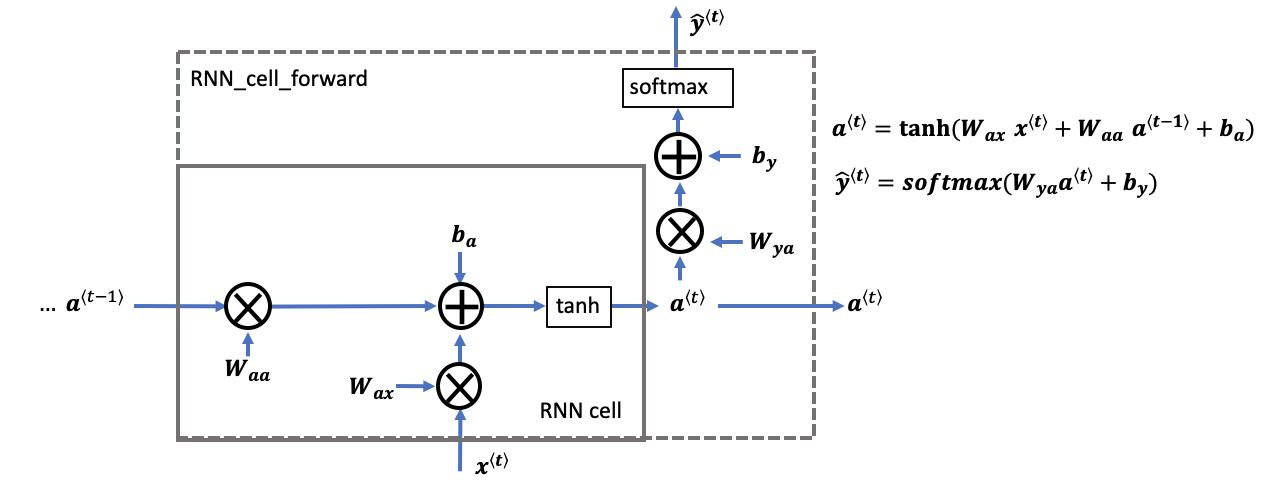

Basic RNN cell. Takes as input  𝑥⟨𝑡⟩  (current input) and  𝑎⟨𝑡−1⟩  (previous hidden state containing information from the past), and outputs  𝑎⟨𝑡⟩  which is given to the next RNN cell and also used to predict  𝑦̂ ⟨𝑡⟩

In [2]:
def softmax(x):
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum(axis=0)

In [32]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [11]:
def forward_simple_RNN_Cell(X,A_prev,parameters):
  Wax = parameters["Wax"]
  Waa = parameters["Waa"]
  Wya = parameters["Wya"]
  ba = parameters["ba"]
  by = parameters["by"]
  At=np.tanh(np.dot(Wax,X)+np.dot(Waa,A_prev)+ba)
  y_hat_t=softmax(np.dot(Wya,At)+by)
  cache = (At, A_prev, X, parameters)
    
  return At, y_hat_t, cache

In [30]:
def Simple_RNN_forward(X, A0, parameters):
  n_x, m, T_x = X.shape
  n_y, n_a = parameters["Wya"].shape

  A = np.zeros([n_a,m,T_x])
  y_hat = np.zeros([n_y,m,T_x])

  caches = []
  A_next = A0

  for t in range(T_x):
    A_next, y_hat_t, cache = forward_simple_RNN_Cell(X[:,:,t], A_next, parameters)
    A[:,:,t] = A_next
    y_hat[:,:,t] = y_hat_t
    caches.append(cache)

  caches = (caches, X)

  return A, y_hat, caches


In [33]:
def forward_LSTM_cell(Xt, A_prev, C_prev, parameters):
    """
    Implement a single forward step of the LSTM-cell as described in Figure (4)

    Arguments:
    xt -- your input data at timestep "t", numpy array of shape (n_x, m).
    a_prev -- Hidden state at timestep "t-1", numpy array of shape (n_a, m)
    c_prev -- Memory state at timestep "t-1", numpy array of shape (n_a, m)
    parameters -- python dictionary containing:
                        Wf -- Weight matrix of the forget gate, numpy array of shape (n_a, n_a + n_x)
                        bf -- Bias of the forget gate, numpy array of shape (n_a, 1)
                        Wi -- Weight matrix of the update gate, numpy array of shape (n_a, n_a + n_x)
                        bi -- Bias of the update gate, numpy array of shape (n_a, 1)
                        Wc -- Weight matrix of the first "tanh", numpy array of shape (n_a, n_a + n_x)
                        bc --  Bias of the first "tanh", numpy array of shape (n_a, 1)
                        Wo -- Weight matrix of the output gate, numpy array of shape (n_a, n_a + n_x)
                        bo --  Bias of the output gate, numpy array of shape (n_a, 1)
                        Wy -- Weight matrix relating the hidden-state to the output, numpy array of shape (n_y, n_a)
                        by -- Bias relating the hidden-state to the output, numpy array of shape (n_y, 1)
                        
    Returns:
    a_next -- next hidden state, of shape (n_a, m)
    c_next -- next memory state, of shape (n_a, m)
    yt_pred -- prediction at timestep "t", numpy array of shape (n_y, m)
    cache -- tuple of values needed for the backward pass, contains (a_next, c_next, a_prev, c_prev, xt, parameters)
    
    Note: ft/it/ot stand for the forget/update/output gates, cct stands for the candidate value (c tilde),
          c stands for the cell state (memory)
    """
    Wf = parameters["Wf"] ; bf = parameters["bf"] ; Wi = parameters["Wi"] ; bi = parameters["bi"] ; Wc = parameters["Wc"] 
    bc = parameters["bc"] ; Wo = parameters["Wo"] ; bo = parameters["bo"] ; Wy = parameters["Wy"] ; by = parameters["by"] 
    
    n_x, m = Xt.shape
    n_y, n_a = Wy.shape

    concat = np.zeros([n_x+n_a,m])
    concat[: n_a, :] = A_prev
    concat[n_a :, :] = Xt

    ft = sigmoid(np.dot(Wf,concat)+bf)
    it = sigmoid(np.dot(Wi,concat)+bi)
    C_hat_t = np.tanh(np.dot(Wc,concat)+bc)
    C_next = ft*C_prev +it*C_hat_t
    ot = sigmoid(np.dot(Wo,concat)+bo)
    A_next = ot*np.tanh(C_next)
    
    # Compute prediction of the LSTM cell (≈1 line)
    y_hat_t = softmax(np.dot(Wy,A_next)+by)
    ### END CODE HERE ###

    # store values needed for backward propagation in cache
    cache = (A_next, C_next, A_prev, C_prev, ft, it, C_hat_t, ot, Xt, parameters)

    return A_next, C_next, y_hat_t, cache

In [43]:
def forward_LSTM(X, A0, parameters):
    """
    Implement the forward propagation of the recurrent neural network using an LSTM-cell described in Figure (4).

    Arguments:
    x -- Input data for every time-step, of shape (n_x, m, T_x).
    a0 -- Initial hidden state, of shape (n_a, m)
    parameters -- python dictionary containing:
                        Wf -- Weight matrix of the forget gate, numpy array of shape (n_a, n_a + n_x)
                        bf -- Bias of the forget gate, numpy array of shape (n_a, 1)
                        Wi -- Weight matrix of the update gate, numpy array of shape (n_a, n_a + n_x)
                        bi -- Bias of the update gate, numpy array of shape (n_a, 1)
                        Wc -- Weight matrix of the first "tanh", numpy array of shape (n_a, n_a + n_x)
                        bc -- Bias of the first "tanh", numpy array of shape (n_a, 1)
                        Wo -- Weight matrix of the output gate, numpy array of shape (n_a, n_a + n_x)
                        bo -- Bias of the output gate, numpy array of shape (n_a, 1)
                        Wy -- Weight matrix relating the hidden-state to the output, numpy array of shape (n_y, n_a)
                        by -- Bias relating the hidden-state to the output, numpy array of shape (n_y, 1)
                        
    Returns:
    a -- Hidden states for every time-step, numpy array of shape (n_a, m, T_x)
    y -- Predictions for every time-step, numpy array of shape (n_y, m, T_x)
    c -- The value of the cell state, numpy array of shape (n_a, m, T_x)
    caches -- tuple of values needed for the backward pass, contains (list of all the caches, x)
    """
    caches = []

    n_x, m, T_x = X.shape
    n_y, n_a = parameters['Wy'].shape
    
    ArithmeticError = np.zeros([n_a, m, T_x])
    A = np.zeros([n_a, m, T_x])
    C = np.zeros([n_a, m, T_x])
    y_hat = np.zeros([n_y, m, T_x])
    
    A_next = A0
    C_next = np.zeros([n_a,m])
    
    for t in range(T_x):
        A_next, C_next, y_hat_t, cache = forward_LSTM_cell(X[:,:,t], A_next, C_next, parameters)
        A[:,:,t] = A_next
        y_hat[:,:,t] = y_hat_t
        C[:,:,t]  = C_next
        caches.append(cache)

    caches = (caches, X)

    return A, y_hat, C, caches

In [47]:
def backward_simple_RNN_cell(da_next, cache):
    """
    Implements the backward pass for the RNN-cell (single time-step).

    Arguments:
    da_next -- Gradient of loss with respect to next hidden state
    cache -- python dictionary containing useful values (output of rnn_cell_forward())

    Returns:
    gradients -- python dictionary containing:
                        dx -- Gradients of input data, of shape (n_x, m)
                        da_prev -- Gradients of previous hidden state, of shape (n_a, m)
                        dWax -- Gradients of input-to-hidden weights, of shape (n_a, n_x)
                        dWaa -- Gradients of hidden-to-hidden weights, of shape (n_a, n_a)
                        dba -- Gradients of bias vector, of shape (n_a, 1)
    """
    
    (a_next, a_prev, xt, parameters) = cache
    
    Wax = parameters["Wax"]
    Waa = parameters["Waa"]
    Wya = parameters["Wya"]
    ba = parameters["ba"]
    by = parameters["by"]

    dtanh = (1-a_next*a_next)*da_next

    dxt = np.dot(Wax.T,  dtanh)
    dWax = np.dot(dtanh,xt.T)

    da_prev = np.dot(Waa.T, dtanh)  
    dWaa = np.dot( dtanh,a_prev.T)

    dba = np.sum( dtanh,keepdims=True,axis=-1)

    gradients = {"dxt": dxt, "da_prev": da_prev, "dWax": dWax, "dWaa": dWaa, "dba": dba}
    
    return gradients

In [49]:
def backward_simple_RNN(da, caches):
    """
    Implement the backward pass for a RNN over an entire sequence of input data.

    Arguments:
    da -- Upstream gradients of all hidden states, of shape (n_a, m, T_x)
    caches -- tuple containing information from the forward pass (rnn_forward)
    
    Returns:
    gradients -- python dictionary containing:
                        dx -- Gradient w.r.t. the input data, numpy-array of shape (n_x, m, T_x)
                        da0 -- Gradient w.r.t the initial hidden state, numpy-array of shape (n_a, m)
                        dWax -- Gradient w.r.t the input's weight matrix, numpy-array of shape (n_a, n_x)
                        dWaa -- Gradient w.r.t the hidden state's weight matrix, numpy array of shape (n_a, n_a)
                        dba -- Gradient w.r.t the bias, of shape (n_a, 1)
    """
    (caches, x) = caches
    (a1, a0, x1, parameters) = caches[0]

    n_a, m, T_x = da.shape
    n_x, m = x1.shape 

    dx = np.zeros((n_x, m, T_x)) 
    dWax = np.zeros((n_a, n_x))
    dWaa = np.zeros((n_a, n_a))
    dba = np.zeros((n_a, 1)) 
    da0 = np.zeros((n_a, m))
    da_prevt = np.zeros((n_a, m))  

    for t in reversed(range(T_x)):
        gradients = backward_simple_RNN_cell(da[:, :, t] + da_prevt, caches[t])
        dxt, da_prevt, dWaxt, dWaat, dbat = gradients["dxt"], gradients["da_prev"], gradients["dWax"], gradients["dWaa"], gradients["dba"]
        dx[:, :, t] = dxt  
        dWax += dWaxt  
        dWaa += dWaat  
        dba += dbat  
         
    da0 = da_prevt

    gradients = {"dx": dx, "da0": da0, "dWax": dWax, "dWaa": dWaa,"dba": dba}
    
    return gradients

In [50]:
def backward_LSTM_cell(da_next, dc_next, cache):
    """
    Implement the backward pass for the LSTM-cell (single time-step).

    Arguments:
    da_next -- Gradients of next hidden state, of shape (n_a, m)
    dc_next -- Gradients of next cell state, of shape (n_a, m)
    cache -- cache storing information from the forward pass

    Returns:
    gradients -- python dictionary containing:
                        dxt -- Gradient of input data at time-step t, of shape (n_x, m)
                        da_prev -- Gradient w.r.t. the previous hidden state, numpy array of shape (n_a, m)
                        dc_prev -- Gradient w.r.t. the previous memory state, of shape (n_a, m, T_x)
                        dWf -- Gradient w.r.t. the weight matrix of the forget gate, numpy array of shape (n_a, n_a + n_x)
                        dWi -- Gradient w.r.t. the weight matrix of the update gate, numpy array of shape (n_a, n_a + n_x)
                        dWc -- Gradient w.r.t. the weight matrix of the memory gate, numpy array of shape (n_a, n_a + n_x)
                        dWo -- Gradient w.r.t. the weight matrix of the output gate, numpy array of shape (n_a, n_a + n_x)
                        dbf -- Gradient w.r.t. biases of the forget gate, of shape (n_a, 1)
                        dbi -- Gradient w.r.t. biases of the update gate, of shape (n_a, 1)
                        dbc -- Gradient w.r.t. biases of the memory gate, of shape (n_a, 1)
                        dbo -- Gradient w.r.t. biases of the output gate, of shape (n_a, 1)
    """
    (a_next, c_next, a_prev, c_prev, ft, it, cct, ot, xt, parameters) = cache
    
    n_x, m = xt.shape 
    n_a, m = a_next.shape 

    dit = (da_next * ot * (1 - np.tanh(c_next) ** 2) + dc_next) * cct * (1 - it) * it
    dft = (da_next * ot * (1 - np.tanh(c_next) ** 2) + dc_next) * c_prev * ft * (1 - ft)
    dot = da_next * np.tanh(c_next) * ot * (1 - ot)
    dcct = (da_next * ot * (1 - np.tanh(c_next) ** 2) + dc_next) * it * (1 - cct ** 2)

    dWf = np.dot(dft,np.concatenate((a_prev, xt), axis=0).T) 
    dWi = np.dot(dit,np.concatenate((a_prev, xt), axis=0).T)
    dWc = np.dot(dcct,np.concatenate((a_prev, xt), axis=0).T)
    dWo = np.dot(dot,np.concatenate((a_prev, xt), axis=0).T)
    dbf = np.sum(dft,axis=1,keepdims=True)
    dbi = np.sum(dit,axis=1,keepdims=True) 
    dbc = np.sum(dcct,axis=1,keepdims=True) 
    dbo = np.sum(dot,axis=1,keepdims=True)  

    da_prev = np.dot(parameters['Wf'][:,:n_a].T,dft)+np.dot(parameters['Wi'][:,:n_a].T,dit)+np.dot(parameters['Wc'][:,:n_a].T,dcct)+np.dot(parameters['Wo'][:,:n_a].T,dot) 
    dc_prev = dc_next*ft+ot*(1-np.square(np.tanh(c_next)))*ft*da_next 
    dxt = np.dot(parameters['Wf'][:,n_a:].T,dft)+np.dot(parameters['Wi'][:,n_a:].T,dit)+np.dot(parameters['Wc'][:,n_a:].T,dcct)+np.dot(parameters['Wo'][:,n_a:].T,dot) 

    gradients = {"dxt": dxt, "da_prev": da_prev, "dc_prev": dc_prev, "dWf": dWf,"dbf": dbf, "dWi": dWi,"dbi": dbi,
                "dWc": dWc,"dbc": dbc, "dWo": dWo,"dbo": dbo}

    return gradients

In [52]:
def backward_LSTM(da, caches):
    
    """
    Implement the backward pass for the RNN with LSTM-cell (over a whole sequence).

    Arguments:
    da -- Gradients w.r.t the hidden states, numpy-array of shape (n_a, m, T_x)
    caches -- cache storing information from the forward pass (lstm_forward)

    Returns:
    gradients -- python dictionary containing:
                        dx -- Gradient of inputs, of shape (n_x, m, T_x)
                        da0 -- Gradient w.r.t. the previous hidden state, numpy array of shape (n_a, m)
                        dWf -- Gradient w.r.t. the weight matrix of the forget gate, numpy array of shape (n_a, n_a + n_x)
                        dWi -- Gradient w.r.t. the weight matrix of the update gate, numpy array of shape (n_a, n_a + n_x)
                        dWc -- Gradient w.r.t. the weight matrix of the memory gate, numpy array of shape (n_a, n_a + n_x)
                        dWo -- Gradient w.r.t. the weight matrix of the save gate, numpy array of shape (n_a, n_a + n_x)
                        dbf -- Gradient w.r.t. biases of the forget gate, of shape (n_a, 1)
                        dbi -- Gradient w.r.t. biases of the update gate, of shape (n_a, 1)
                        dbc -- Gradient w.r.t. biases of the memory gate, of shape (n_a, 1)
                        dbo -- Gradient w.r.t. biases of the save gate, of shape (n_a, 1)
    """
    (caches, x) = caches
    (a1, c1, a0, c0, f1, i1, cc1, o1, x1, parameters) = caches[0]
    
    n_a, m, T_x = da.shape
    n_x, m = x1.shape
    
    dx = np.zeros((n_x, m, T_x))
    da0 = np.zeros((n_a, m))
    da_prevt = np.zeros((n_a, m))
    dc_prevt = np.zeros((n_a, m))
    dWf = np.zeros((n_a, n_a + n_x))
    dWi = np.zeros((n_a, n_a + n_x))
    dWc = np.zeros((n_a, n_a + n_x))
    dWo = np.zeros((n_a, n_a + n_x))
    dbf = np.zeros((n_a, 1))
    dbi = np.zeros((n_a, 1))
    dbc = np.zeros((n_a, 1))
    dbo = np.zeros((n_a, 1))
    
    for t in reversed(range(T_x)):
        gradients = lstm_cell_backward(da[:,:,t] + da_prevt, dc_prevt, caches[t])
        dx[:,:,t] = gradients["dxt"]
        dWf += gradients["dWf"]
        dWi += gradients["dWi"]
        dWc += gradients["dWc"]
        dWo += gradients["dWo"]
        dbf += gradients["dbf"]
        dbi += gradients["dbi"]
        dbc += gradients["dbc"]
        dbo += gradients["dbo"]
    da0 = gradients["da_prev"]

    gradients = {"dx": dx, "da0": da0, "dWf": dWf,"dbf": dbf, "dWi": dWi,"dbi": dbi,
                "dWc": dWc,"dbc": dbc, "dWo": dWo,"dbo": dbo}
    
    return gradients